In [63]:
from cache import TONE_SPIKES_DIR
import os
import numpy as np
from analysis.spike_tensor import generate_spike_tensor

single_tone = np.load(os.path.join(TONE_SPIKES_DIR, "200hz.npy"))
mult_tone = np.load(os.path.join(TONE_SPIKES_DIR, "2345_00Hz.npy"))
single_tensor = generate_spike_tensor(single_tone, duration=0.3)
mult_tensor = generate_spike_tensor(mult_tone, duration=0.3)

In [64]:
from scipy.io import loadmat
import numpy as np
from matplotlib.pyplot import plot, axvline

CFs = loadmat("cached/CFs.mat")["CFs"][0]
sponts = np.load("model/sponts.npy")

In [65]:
def sample(freq, shouldPlot=False):
    for i, f in enumerate(CFs):
        if f > freq:
            # print(i, f)
            sample_cf_idx = i-1
            break

    cf = single_tensor[sample_cf_idx]
    spont = sponts[sample_cf_idx] / 100

    spike_sums = np.sum(cf, axis=1)
    sum_activity_norm = spike_sums / spont
    final_activity_norm = sum_activity_norm / np.sum(sum_activity_norm)
    if shouldPlot:
        plot(final_activity_norm)
        print(len(final_activity_norm))
        print(sum(final_activity_norm))
    return final_activity_norm

In [66]:
def calculate_center_of_weight(distribution):
    weighted_sum = sum(value * (index + 1) for index, value in enumerate(distribution))
    total_weight = sum(distribution)
    center_of_weight = weighted_sum / total_weight
    
    return center_of_weight


In [67]:
weights = [calculate_center_of_weight(sample(freq)) for freq in range(125, 800)]

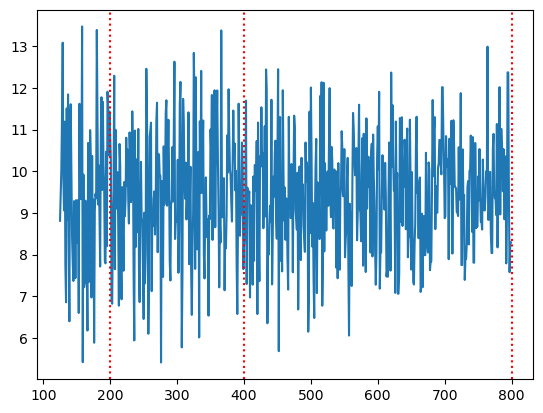

In [68]:
plot(list(range(125, 800)), weights)
x_points = [200, 400, 800]
for x in x_points:
    axvline(x=x, color='r', linestyle=':')  # 'r' denotes red color

3.3000000000000003

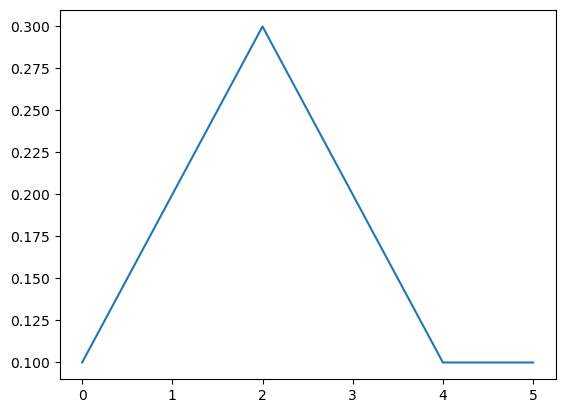

In [70]:
plot([
    .1,
    .2,
    .3,
    .2,
    .1,
    .1
])
calculate_center_of_weight([
    .1,
    .2,
    .3,
    .2,
    .1,
    .1
])